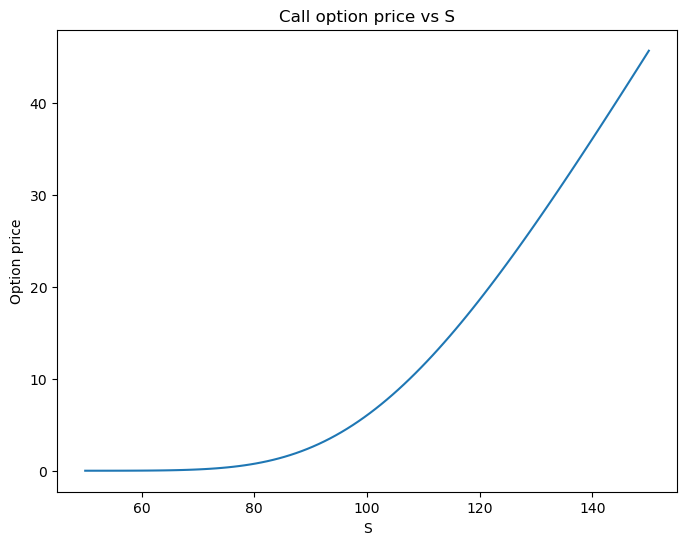

In [1]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt


def black_scholes(S, K, T, r, sigma, option_type):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    if option_type == "call":
        price = S*si.norm.cdf(d1) - K*np.exp(-r*T)*si.norm.cdf(d2)
    elif option_type == "put":
        price = K*np.exp(-r*T)*si.norm.cdf(-d2) - S*si.norm.cdf(-d1)
    
    return price



def plot_option_price(S, K, T, r, sigma, option_type):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(f"{option_type.capitalize()} option price vs {variable.capitalize()}")
    ax.set_xlabel(variable)
    ax.set_ylabel("Option price")
    
    variable_values = np.linspace(variable_min, variable_max, num_points)
    option_prices = np.zeros_like(variable_values)
    
    for i, v in enumerate(variable_values):
        if variable == "S":
            S = v
        elif variable == "K":
            K = v
        elif variable == "T":
            T = v
        elif variable == "r":
            r = v
        elif variable == "sigma":
            sigma = v
        
        option_prices[i] = black_scholes(S, K, T, r, sigma, option_type)
    
    ax.plot(variable_values, option_prices)
    plt.show()

    
S = 100  # stock price
K = 110  # strike price
T = 1    # time to maturity (in years)
r = 0.05 # risk-free interest rate
sigma = 0.2 # volatility
option_type = "call" # option type: "call" or "put"




variable = "S" # variable to be plotted
variable_min = 50 # minimum value of the variable
variable_max = 150 # maximum value of the variable
num_points = 100 # number of points to plot


plot_option_price(S, K, T, r, sigma, option_type)
